In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## B.1 d.

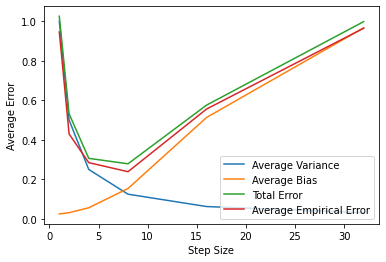

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(10)

n = 256
sigma2 = 1
mean = 0
m_list = [1,2,4,8,16,32]
xList = np.array(range(1,n+1))/n
    
def f(x):
    return 4 * np.sin(np.pi * x) * np.cos(6 * np.pi * x ** 2)

def y_i(x):
    return f(x) +  np.random.normal(0,1) 


def cj(m,j):
    sum = 0.0
    for i in range((j-1) * m + 1, j * m + 1):
        sum += y_i(i/n)
    return sum/m

def f_hat(x, m):
    sum = 0.0
    for j in range(1, int(n/m) + 1):
        if ((x > (j -1) *1.0* m /n) and (x <= j*m*1.0/n)):
            sum += cj(m,j)
    return sum

def f_bar(j,m):
    sum = 0.0
    for i in range((j-1)*m+1, j*m + 1):
        sum += f(i/n)
    return sum/m

def bias(m,n):
    output = 0.0
    for j in range(1, int(n/m)+1):
        for i in range((j-1)*m, j*m):
            output += (f_bar(j, m) - f(i/n))**2
    return output/n

def variance(sigma2, m):
    return sigma2 / m
    
#Initialize 
empirical_error = []
bias_list = []
bias_sum = 0.0
variance_list = []
total_error = []

#Start iteration
for m in m_list:
    empirical_error_sum = 0.0
    # empirical_error
    for i in range(1,n+1):
        empirical_error_sum += (f_hat(i/n, m) - f(i/n))**2
    empirical_error.append(empirical_error_sum/n)
    # variance
    bias_list.append(bias(m,n))
    # bias
    variance_list.append(variance(sigma2, m))
    #total error
    total_error = np.array(bias_list) + np.array(variance_list)


plt.plot(m_list,variance_list, label="Average Variance")
plt.plot(m_list,bias_list, label="Average Bias")
plt.plot(m_list,total_error, label="Total Error")
plt.plot(m_list,empirical_error, label="Average Empirical Error")
plt.xlabel("Step Size")
plt.ylabel("Average Error")
plt.legend()
# plt.savefig('pic_1.png')

## B.1 e.

In [28]:
    def polyfeatures(X, degree):
        """
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d numpy array, with each row comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 column numpy array
            degree is a positive integer
        """
        outputX = X[:]
        for i in range(2, degree + 1):
            outputX = np.hstack((outputX,X**i))
        return outputX

In [74]:
X = polyfeatures(X, 8)
X

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [5.0000000e-01, 2.5000000e-01, 1.2500000e-01, 6.2500000e-02,
        3.1250000e-02, 1.5625000e-02, 7.8125000e-03, 3.9062500e-03],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 1.6000000e+01,
        3.2000000e+01, 6.4000000e+01, 1.2800000e+02, 2.5600000e+02],
       [3.0000000e+00, 9.0000000e+00, 2.7000000e+01, 8.1000000e+01,
        2.4300000e+02, 7.2900000e+02, 2.1870000e+03, 6.5610000e+03],
       [5.0000000e+00, 2.5000000e+01, 1.2500000e+02, 6.2500000e+02,
        3.1250000e+03, 1.5625000e+04, 7.8125000e+04, 3.9062500e+05],
       [6.0000000e+00, 3.6000000e+01, 2.1600000e+02, 1.2960000e+03,
        7.7760000e+03, 4.6656000e+04, 2.7993600e+05, 1.6796160e+06],
       [7.0000000e+00, 4.9000000e+01, 3.4

In [25]:
X[:]

array([[  1,   1,   1,   1,   1,   1,   1,   1],
       [  2,   2,   4,   4,   8,   8,  64,  64],
       [  3,   3,   9,   9,  27,  27, 729, 729]])

In [75]:
print(np.mean(X, axis=0))

[4.68181818e+00 3.35681818e+01 2.69193182e+02 2.27973295e+03
 1.99819119e+04 1.79482638e+05 1.64218555e+06 1.52423452e+07]


In [35]:
np.std(X, axis=0)

array([  0.81649658,   3.29983165,  10.98483804,  34.72111109,
       107.52054067, 329.33906878])

In [76]:
(X - np.mean(X, axis=0)) / np.std(X, axis=0)

array([[-1.37174912, -0.98862159, -0.82287963, -0.71929242, -0.6461    ,
        -0.59142778, -0.5491368 , -0.51555101],
       [-1.22525164, -0.98125881, -0.82249753, -0.7192727 , -0.64609899,
        -0.59142773, -0.5491368 , -0.51555101],
       [-1.07875416, -0.95917044, -0.8198228 , -0.71897691, -0.64606767,
        -0.59142449, -0.54913647, -0.51555098],
       [-0.7857592 , -0.87081699, -0.79842494, -0.71424417, -0.64506531,
        -0.59121689, -0.549094  , -0.51554235],
       [-0.49276425, -0.72356123, -0.74034504, -0.69373562, -0.63824278,
        -0.5890256 , -0.54840548, -0.51532909],
       [ 0.09322567, -0.25234282, -0.44077503, -0.52209487, -0.54505549,
        -0.53994058, -0.52301228, -0.50233867],
       [ 0.38622062,  0.07161984, -0.16260288, -0.31038357, -0.39466893,
        -0.43768782, -0.45552791, -0.45874035],
       [ 0.67921558,  0.45448481,  0.2256154 ,  0.0382617 , -0.10265838,
        -0.20375303, -0.27374906, -0.32056468],
       [ 0.97221054,  0.89625207

In [37]:
np.c_[np.ones([len(X), 1]), X]

array([[  1.,   1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.,  64.],
       [  1.,   3.,   9.,  27.,  81., 243., 729.]])

In [87]:
    filePath = "data/polydata.dat"
    file = open(filePath,'r')
    allData = np.loadtxt(file, delimiter=',')

    X = allData[:, [0]]
    y = allData[:, [1]]

In [88]:
X

array([[ 0. ],
       [ 0.5],
       [ 1. ],
       [ 2. ],
       [ 3. ],
       [ 5. ],
       [ 6. ],
       [ 7. ],
       [ 8. ],
       [ 9. ],
       [10. ]])

In [146]:
class PolynomialRegression:

    def __init__(self, degree=1, reg_lambda=1E-8):
        """
        Constructor
        """
        self.theta = None
        self.regLambda = reg_lambda
        self.degree = degree

    def polyfeatures(self, X, degree):
        """
        Expands the given X into an n * d array of polynomial features of
            degree d.

        Returns:
            A n-by-d numpy array, with each row comprising of
            X, X * X, X ** 3, ... up to the dth power of X.
            Note that the returned matrix will not include the zero-th power.

        Arguments:
            X is an n-by-1 column numpy array
            degree is a positive integer
        """
        outputX = X[:]
        for i in range(2, degree + 1):
            outputX = np.hstack((outputX,X**i))
        return outputX


    def fit(self, X, y):
        """
            Trains the model
            Arguments:
                X is a n-by-1 array
                y is an n-by-1 array
            Returns:
                No return value
            Note:
                You need to apply polynomial expansion and scaling
                at first
        """
        n = len(X)
        # standardization
        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        X = self.polyfeatures(X, self.degree)
        print(X)

        X = np.c_[np.ones([n, 1]), X]
        

        # add 1s column

        n, d = X.shape

        self.theta = np.linalg.solve((X.T @ X) + self.regLambda*np.identity(d), X.T @ y)
        print(self.theta)

    def predict(self, X):
        """
        Use the trained model to predict values for each instance in X
        Arguments:
            X is a n-by-1 numpy array
        Returns:
            an n-by-1 numpy array of the predictions
        """

        n = len(X)
        X = self.polyfeatures(X, self.degree)

        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        # add 1s column
        X_ = np.c_[np.ones([n, 1]), X]

        # predict
        return X_ @ self.theta
    
    def trainPredicted(self, X):
        n = len(X)
        X = self.polyfeatures(X, self.degree)

        X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
        # add 1s column
        X_ = np.c_[np.ones([n, 1]), X]

        # predict
        return X_ @ self.theta

In [144]:
from sklearn import model_selection
loo = model_selection.LeaveOneOut()
for train_index, test_index in loo.split(X):
    Xtrain, Xtest = X[train_index], X[test_index]
    ytrain, ytest = y[train_index], y[test_index]

n = len(Xtrain)

errorTrain = np.zeros(n)
errorTest = np.zeros(n)

for i in range(1, 1 + 1):
    model = PolynomialRegression(8, 0)
    model.fit(Xtrain[:i], Ytrain[:i])
    testPredicted = model.predict(Xtest)
    singleErrorFromTrain = np.mean((model.trainPredicted(Xtrain[:i]) - ytrain[:i])**2)

    errorTrain = np.append(errorTrain, singleErrorFromTrain)

    singleErrorFromTest = np.mean((testPredicted - ytest[:i])**2)
    errorTest = np.append(errorTest, singleErrorFromTest)

[[nan nan nan nan nan nan nan nan]]
[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]]


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:72: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:83: RuntimeWarning: invalid value encountered in true_divide


In [272]:
import mnist
import numpy as np

mndata = mnist.MNIST("./python-mnist/data/")
X_train, labels_train = map(np.array, mndata.load_training()) 
X_test, labels_test = map(np.array, mndata.load_testing()) 
X_train = X_train/255.0
X_test = X_test/255.0

# Train function
def train(X,y,lam):
    n, d = X.shape
    y = np.eye(10)[y] # put y into a one hot encoding matrix
    W = np.linalg.pinv(X.T @ X + lam*np.identity(d)) @ (X.T @ y)
    return W

def predict(W, X_new):    
    return (X_new @ W_hat).argmax(axis=1)

# Compute weights
W_hat = train(X_train, labels_train, lam = 0.0001)
# Computed predicted training label
predicted_train = predict(W=W_hat, X_new=X_train)
# Compute predicted testing label
predicted = predict(W=W_hat, X_new=X_test)
# Compute error rate for both training and testing
train_error_rate = 1 -( sum(predicted_train == labels_train) / len(labels_train))
test_error_rate = 1 - (sum(predicted == labels_test) / len(labels_test))

print("Training Error is: ", train_error_rate)
print("Testing Error Rate is: ", test_error_rate)

#Training Error is:  0.14806666666666668
#Testing Error Rate is:  0.14659999999999995

Training Error is:  0.14806666666666668
Testing Error Rate is:  0.14659999999999995


In [154]:
W_hat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [162]:
X_train[0] @ W_hat

array([ 0.08725676,  0.0060165 , -0.09421653,  0.4318183 , -0.20646337,
        0.51215081,  0.1846211 ,  0.31579418, -0.13036904, -0.10142578])

In [165]:
X_train.shape

(60000, 784)

In [164]:
np.eye(10)[labels_train][0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [278]:
p = 100
n, d = X_train.shape

G = np.random.normal(0, np.sqrt(0.1), p*d).reshape((p, d))
b = np.random.uniform(0, 2*np.pi, p).reshape((p,1))
h = ((G @ X_train.T)+b).T
h[0]

array([ 6.55344451e+00,  5.76165108e+00,  8.02763283e+00,  7.06792668e+00,
        2.52076158e+00,  7.02686084e+00,  3.56688585e+00,  7.92413154e+00,
        1.89820468e+00,  3.61389432e+00,  2.43074614e+00, -1.41210088e-02,
        2.07813076e+00,  2.84301541e+00,  4.23754326e+00, -5.61041564e+00,
        8.71521026e-01,  2.53601132e+00,  5.75336149e+00,  3.42946277e+00,
        3.59568925e-01, -1.89076913e+00, -4.46573033e+00,  1.01483276e-02,
        2.43579870e+00, -2.04840347e+00,  1.64821575e+00,  6.85762453e+00,
        5.41890597e+00,  6.78412974e+00,  5.74020137e+00,  4.74081615e+00,
       -4.48499951e+00,  3.20714303e+00, -8.78122809e-01,  3.31128904e+00,
        8.11347883e+00, -6.41202293e-01, -4.27859382e-02,  8.98631452e+00,
        7.18058465e+00,  1.06465576e+00,  7.85646436e+00,  5.02078651e+00,
        2.84064131e+00,  3.37934305e+00,  4.32426341e+00,  1.11475039e+00,
        7.19293807e+00,  4.41040749e-01, -5.62791217e-01,  1.20665444e+01,
        8.08920201e+00,  

In [231]:
a= np.random.permutation([[1, 4, 9, 12, 15],
                      [2,2,2,2,2],
                      [3,3,3,3,3]])
a

array([[ 1,  4,  9, 12, 15],
       [ 2,  2,  2,  2,  2],
       [ 3,  3,  3,  3,  3]])

In [281]:
np.cos((((G @ X_train.T)+b).T)[0])

array([ 0.96370173,  0.86705583, -0.17277978,  0.70757105, -0.81339529,
        0.73598521, -0.9109178 , -0.07009239, -0.32159014, -0.89052353,
       -0.75780981,  0.9999003 , -0.48584915, -0.95575597, -0.45720125,
        0.78209874,  0.64366324, -0.82217132,  0.86289612, -0.95885075,
        0.93604859, -0.31454074, -0.24416511,  0.99994851, -0.7610968 ,
       -0.45965541, -0.07734211,  0.83949714,  0.64918844,  0.87712939,
        0.85617071,  0.02842334, -0.22543497, -0.99785234,  0.63859684,
       -0.98563609, -0.25659462,  0.80137717,  0.99908482, -0.90540508,
        0.62364503,  0.48480532, -0.00248272,  0.30353216, -0.95505492,
       -0.97187025, -0.37845407,  0.4404016 ,  0.61394093,  0.90430788,
        0.84576916,  0.87766587, -0.2330573 , -0.98195421, -0.87341908,
        0.63601266, -0.29460999, -0.38463373,  0.27532648,  0.04464947,
        0.96425023, -0.0792363 , -0.85912505, -0.03190277,  0.06981046,
        0.41218987, -0.39247242,  0.99559091, -0.83991901, -0.85

# B2.A

In [11]:
%%time
import numpy as np
import matplotlib.pyplot as plt
import mnist
bestw = None


mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

CPU times: user 5.64 s, sys: 559 ms, total: 6.2 s
Wall time: 6.29 s


In [76]:

# This function trains the model the return the weights
def train(X, Y):
    lambda_ = 0.0001
    n, d = np.shape(X)
    reg_matrix = lambda_ * np.identity(d)
    reg_matrix[0,0] = 0
    W = np.linalg.solve(X.T @ X + reg_matrix, X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    return (X @ W).argmax(axis = 1)

# This function applt the transformation to data
def h1(X_train, p):
    n, d = X_train.shape
    var = np.sqrt(0.1)
    G = np.random.normal(0, var, p * d).reshape(p, d)
    b = np.random.uniform(0, 2 * np.pi, p).reshape(1, p)
    h = np.cos(np.dot(X_train, G.T) + b.T)
    return h

n, d = X_train.shape
training_error_all = []
validing_error_all = []
W_list = []
# loop from p=500 to p=6000, step=500
for p in list(range(500, 6001, 500)):
    h = h1(X_train, p)
    # Train test split with 80%-20%    
    train_index = np.random.choice(np.arange(n), int(X_train.shape[0] * 0.8), replace=False)
    valid_index = np.setdiff1d(np.arange(n), train_index)
    train_data = h[train_index, :]
    valid_data = h[valid_index, :]
    y_train = np.eye(10)[labels_train[train_index]]

    # Compute weights
    W_hat = train(train_data, y_train)
    W_list.append(W_hat)
    # Compute train predicted
    predict_train = predict(W_hat, train_data)
    predict_train = labels_train[train_index] - predict_train
    train_error_single = np.count_nonzero(predict_train) / len(predict_train) #train_size
    training_error_all.append(train_error_single)
    # Compute test predicted
    predicted_test = predict(W_hat, valid_data)
    predicted_test = labels_train[valid_index] - predicted_test
    valid_error_single = np.count_nonzero(predicted_test) / len(predicted_test)
    validing_error_all.append(valid_error_single)
    
    print("p: ", p,", train_err: ", train_error_single, ", test_err: ", valid_error_single)

ValueError: operands could not be broadcast together with shapes (60000,500) (500,1) 

CPU times: user 5.96 s, sys: 1.14 s, total: 7.1 s
Wall time: 7.25 s


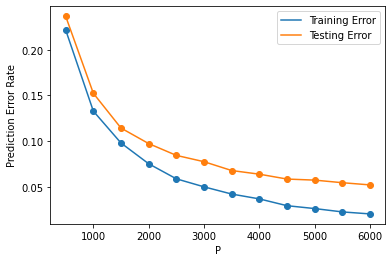

In [3]:
%%time
x_index = list(range(500, 6001, 500))
plt.plot(x_index, training_error_all, label="Training Error")
plt.scatter(x_index, training_error_all)
plt.plot(x_index, validing_error_all, label="Testing Error")
plt.scatter(x_index, validing_error_all)
plt.xlabel("P")
plt.ylabel("Prediction Error Rate")
plt.legend()
plt.savefig('pic_2.png')

# B2.b

In [17]:
%%time

# This function trains the model the return the weights
def train(X, Y):
    lambda_ = 0.0001
    n, d = np.shape(X)
    reg_matrix = lambda_ * np.identity(d)
    reg_matrix[0,0] = 0
    W = np.linalg.solve(X.T @ X + reg_matrix, X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    return (X @ W).argmax(axis = 1)

# This function applt the transformation to data
def h1(X_train, p):
    n, d = X_train.shape
    var = np.sqrt(0.1)
    G = np.random.normal(0, var, p * d).reshape(p, d)
    b = np.random.uniform(0, 2 * np.pi, p).reshape(1, p)
    h = np.cos(G @ X_train.T).T
    return h
    
n, d = X_train.shape
training_error_all = []
validing_error_all = []
W_list = []
# Train test split with 80%-20%
h = h1(X_train, p)
train_index = np.random.choice(np.arange(n), int(X_train.shape[0] * 0.8), replace=False)
valid_index = np.setdiff1d(np.arange(n), train_index)
train_data = h[train_index, :]
valid_data = h[valid_index, :]
y_train = np.eye(10)[labels_train[train_index]]

# loop from p=500 to p=6000, step=500
for p in [6000]:
    # Compute weights
    W_hat = train(train_data, y_train)
    W_list.append(W_hat)
    # Compute train predicted
    predict_train = predict(W_hat, train_data)
    predict_train = labels_train[train_index] - predict_train
    train_error_single = np.count_nonzero(predict_train) / len(predict_train) #train_size
    training_error_all.append(train_error_single)
    # Compute test predicted
    predicted_test = predict(W_hat, valid_data)
    predicted_test = labels_train[valid_index] - predicted_test
    valid_error_single = np.count_nonzero(predicted_test) / len(predicted_test)
    validing_error_all.append(valid_error_single)
    
    print("p: ", p,", train_err: ", train_error_single, ", test_err: ", valid_error_single)

p:  6000 , train_err:  0.0193125 , test_err:  0.051833333333333335
CPU times: user 1min 42s, sys: 12.7 s, total: 1min 55s
Wall time: 50.3 s


In [34]:
%%time
mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0
# This function trains the model the return the weights
def train(X, Y):
    lambda_ = 0.0001
    n, d = np.shape(X)
    X = np.c_[np.ones([n, 1]), X]
    
    reg_matrix = lambda_ * np.identity(d+1)
    reg_matrix[0,0] = 0
    W = np.linalg.solve(X.T @ X + reg_matrix, X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    n = len(X)
    X = np.c_[np.ones([n, 1]), X]
    return (X @ W).argmax(axis = 1)

# # This function applt the transformation to data
# def h1(X_train, p):
#     n, d = X_train.shape
#     var = np.sqrt(0.1)
#     G = np.random.normal(0, var, p * d).reshape(p, d)
#     b = np.random.uniform(0, 2 * np.pi, p).reshape(1, p)
#     h = np.cos(G @ X_train.T).T
#     return h

def h1 (X , p , train = True ) :
    n , d = X.shape
    # Generate a random matrix G,
    # where each entry sampled i.i.d. from a Gaussian ( mean = 0, variance = 0.1)
    if train:
        G = np.random.normal (0 , np.sqrt(0.1) , (p , d))
        # Generate a random vector b, where each item is Unif (0 , 2pi)
        b = np.random.uniform (0 , 2 * np.pi,(1 , p ))
    else:
        G = None
        b = None
    # return the transformed X: h(X) = cos (GX ’ + b)
    return np.cos(np.matmul(G , X.T).T + b)

CPU times: user 6.05 s, sys: 1.03 s, total: 7.07 s
Wall time: 7.35 s


In [ ]:
dt =0.05    # Delta = 0.05
p = 6000    # From previous question, the best p is 6000.
best_W = W_list[-1]  # The W when p is 6000

sigma = np.sqrt(0.1)
n, d = X_test.shape

h = h1(X_test, p)
predicted = predict(best_W, h)

test_error = sum(predicted == labels_test) / predicted.size
H = np.sqrt(np.log(2/dt)/(2*predicted.size))
print(f'The test_error is {test_error}')
print(f'Confidence Interval:[{test_error - H} : {test_error + H}]')
# The test_error is 0.1197
# Confidence Interval:[0.1061189848425938 : 0.1332810151574062]

In [60]:
%%time
# This function trains the model the return the weights
def train(X, Y, lambda_ = 0.0001):
    n, d = np.shape(X)
    reg_matrix = lambda_ * np.identity(d)
    reg_matrix[0,0] = 0
    W = np.linalg.solve(X.T @ X + reg_matrix, X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    return (X @ W).argmax(axis = 1)

n, d = X_train.shape
sigma = np.sqrt(0.1)
p = 6000
G = np.random.normal(0, sigma, p * d).reshape(p, d)
b = np.random.uniform(0, 2 * np.pi, p).reshape(1, p)

# This function applt the transformation to data
def h1(X_train, G, b):
    return np.cos(np.dot(X_train, G.T) + b.T)

dt =0.05    # Delta = 0.05
p = 6000    # From previous question, the best p is 6000.

# Gew W
h_train = h1(X_train, G, b)
y_train = np.eye(10)[labels_train]

best_W = train(h_train, y_train, lambda_= 0.01)
print('train complete')

sigma = np.sqrt(0.1)
n, d = X_test.shape

h_test = h1(X_test, G, b)
predicted = predict(best_W, h_test)
print('predict complete')

test_error = sum(predicted == labels_test) / predicted.size
H = np.sqrt(np.log(2/dt)/(2*predicted.size))
print(f'The test_error is {test_error}')
print(f'Confidence Interval:[{test_error - H} : {test_error + H}]')
# The test_error is 0.1197
# Confidence Interval:[0.1061189848425938 : 0.1332810151574062]

ValueError: operands could not be broadcast together with shapes (60000,6000) (6000,1) 

In [58]:
train_percent = 0.8
ori_train_size = X_train.shape[0]
ori_test_size = X_test.shape[0]
Y_train = np.eye(10)[labels_train]
lam = 0.01


variance = 0.1
p = 6000

d = X_test.shape[1]
G = np.random.normal(0, np.sqrt(variance), size = (p,d))
b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 

def transform(X, p):
    d = X_test.shape[1]
    G = np.random.normal(0, np.sqrt(variance), size = (p,d))
    b = np.random.uniform(low=0, high=2*np.pi, size=(p,1)) 
    return np.cos(np.dot(X_test, G.T) + b.T)

index = np.arange(ori_train_size)
np.random.shuffle(index)
train_index = index[0:int(train_percent * ori_train_size)]
validation_index = index[int(train_percent * ori_train_size) : ]

shuffled_labels_validation = labels_train[validation_index]
shuffled_labels_train = labels_train[train_index]

new_Y_train = Y_train[train_index, :]

transed_X_train= np.cos(np.dot(X_train, G.T) + b.T)
# transed_X_train = transform(X_train, p)

new_X_train = transed_X_train[train_index, :]
new_X_validate = transed_X_train[validation_index, :]

Wp = train(new_X_train, new_Y_train)

traned_X_test = np.cos(np.dot(X_test, G.T) + b.T)
# traned_X_test = transform(X_test, p)

test_pre = predict(Wp, traned_X_test)
test_error = sum([1 for i in range(len(test_pre)) if test_pre[i] != labels_test[i] ]) / len(test_pre)
q = X_test.shape[0]
interval = np.sqrt(np.log(40) /  (2*q))
print(test_error)

0.0487


In [51]:
test_error

0.1431

p:  500 , train_err:  0.23435416666666667 , test_err:  0.24916666666666668
p:  1000 , train_err:  0.13804166666666667 , test_err:  0.15216666666666667
p:  1500 , train_err:  0.09716666666666667 , test_err:  0.1165
p:  2000 , train_err:  0.076875 , test_err:  0.09683333333333333
p:  2500 , train_err:  0.06127083333333333 , test_err:  0.08308333333333333
p:  3000 , train_err:  0.05222916666666667 , test_err:  0.07283333333333333
p:  3500 , train_err:  0.04054166666666666 , test_err:  0.06333333333333334
p:  4000 , train_err:  0.035854166666666666 , test_err:  0.06225
p:  4500 , train_err:  0.03185416666666667 , test_err:  0.0595
p:  5000 , train_err:  0.026395833333333334 , test_err:  0.051916666666666667
p:  5500 , train_err:  0.023479166666666666 , test_err:  0.052
p:  6000 , train_err:  0.0201875 , test_err:  0.048666666666666664


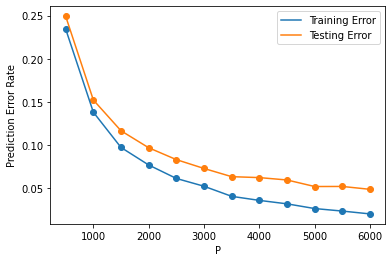

In [99]:

import numpy as np
import matplotlib.pyplot as plt
import mnist

mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0
# This function trains the model the return the weights
def train(X, Y):
    lambda_ = 0.0001
    n, d = np.shape(X)
    W = np.linalg.solve(X.T @ X + lambda_ * np.identity(d), X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    return (X @ W).argmax(axis = 1)

# This function applt the transformation to data
def h1(X_train, X_test, p):
    n, d = X_train.shape
    sigma = np.sqrt(0.1)
    G = np.random.normal(0, sigma, p * d).reshape(p, d)
    b = np.random.uniform(0, 2 * np.pi, p).reshape(p, 1)
    h_train = np.cos(np.dot(X_train, G.T) + b.T)
    h_test = np.cos(np.dot(X_test, G.T) + b.T)

    return h_train, h_test, G, b

n, d = X_train.shape
training_error_all = []
validing_error_all = []
W_list = []
Gb_list = []
train_index = np.random.choice(np.arange(n), int(X_train.shape[0] * 0.8), replace=False)
valid_index = np.setdiff1d(np.arange(n), train_index)
# loop from p=500 to p=6000, step=500
for p in list(range(500, 6001, 500)):
    h_train, h_test, G, b = h1(X_train[train_index, :], X_train[valid_index, :], p)
    # h = h1(X_train, p)
    # Train test split with 80%-20%    
    Gb_list.append((G,b))
    train_data = h_train
    valid_data = h_test
    y_train = np.eye(10)[labels_train[train_index]]

    # Compute weights
    W_hat = train(train_data, y_train)
    W_list.append(W_hat)
    # Compute train predicted
    predict_train = predict(W_hat, train_data)
    predict_train = labels_train[train_index] - predict_train
    train_error_single = np.count_nonzero(predict_train) / len(predict_train) #train_size
    training_error_all.append(train_error_single)
    # Compute test predicted
    predicted_test = predict(W_hat, valid_data)
    predicted_test = labels_train[valid_index] - predicted_test
    valid_error_single = np.count_nonzero(predicted_test) / len(predicted_test)
    validing_error_all.append(valid_error_single)

    print("p: ", p,", train_err: ", train_error_single, ", test_err: ", valid_error_single)

x_index = list(range(500, 6001, 500))
plt.plot(x_index, training_error_all, label="Training Error")
plt.scatter(x_index, training_error_all)
plt.plot(x_index, validing_error_all, label="Testing Error")
plt.scatter(x_index, validing_error_all)
plt.xlabel("P")
plt.ylabel("Prediction Error Rate")
plt.legend()

In [109]:
# Here I am using the testing data to finalize the error rate. 
# The testing data which I did not use in previous question.

# Used weight from the best weight from previous question.
# Used G and b in the previous question to transform the testing data.

mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0

dt =0.05    # Delta = 0.05
p = 6000    # From previous question, the best p is 6000.
W_best = W_list[-1]
sigma = np.sqrt(0.1)
G = Gb_list[-1][0]
b = Gb_list[-1][1]

h_test = np.cos(np.dot(X_test, G.T) + b.T)
y_train = np.eye(10)[labels_train]
print("transform done")
predicted = (h_test @ W_best).argmax(axis = 1)
print("predict done")
test_error = sum(predicted == labels_test) / predicted.size
H = np.sqrt(np.log(2/dt)/(2*predicted.size))
print(f'The test_error is {test_error}')
print(f'Confidence Interval:[{test_error - H} : {test_error + H}]')
# The test_error is 0.9506
# Confidence Interval:[0.9370189848425938 : 0.9641810151574062]

transform done
train done
predict done
The test_error is 0.9506
Confidence Interval:[0.9370189848425938 : 0.9641810151574062]


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import mnist

mndata = mnist.MNIST('./python-mnist/data/')
X_train, labels_train = map(np.array, mndata.load_training())
X_test, labels_test = map(np.array, mndata.load_testing())
X_train = X_train/255.0
X_test = X_test/255.0
# This function trains the model the return the weights
def train(X, Y):
    lambda_ = 0.0001
    n, d = np.shape(X)
    W = np.linalg.solve(X.T @ X + lambda_ * np.identity(d), X.T @ Y)
    return W

# This function do the prediction
def predict(W,X):
    return (X @ W).argmax(axis = 1)

# This function applt the transformation to data
def h1(X_train, X_test, p):
    n, d = X_train.shape
    sigma = np.sqrt(0.1)
    G = np.random.normal(0, sigma, p * d).reshape(p, d)
    b = np.random.uniform(0, 2 * np.pi, p).reshape(p, 1)
    h_train = np.cos(np.dot(X_train, G.T) + b.T)
    h_test = np.cos(np.dot(X_test, G.T) + b.T)

    return h_train, h_test, G, b

In [16]:
%%time
n, d = X_train.shape
p = 6000
dt = 0.05
sigma = np.sqrt(0.1)

h_train, h_test, G, b = h1(X_train, X_test, p)
y_train = np.eye(10)[labels_train]

# Compute weights
W_hat = train(h_train, y_train)
# Compute test predicted
predicted_test = predict(W_hat, h_test)
valid_error_single = 1 - (sum(labels_test == predicted_test) / len(labels_test))

H = np.sqrt(np.log(2/dt)/(2*len(labels_test)))
print(f'The test_error is {valid_error_single}')
print(f'Confidence Interval:[{valid_error_single - H} : {valid_error_single + H}]')
# The test_error is 0.04600000000000004
# Confidence Interval:[0.03241898484259385 : 0.059581015157406235]

The test_error is 0.0484
Confidence Interval:[0.034818984842593804 : 0.06198101515740619]
CPU times: user 1min 54s, sys: 9.97 s, total: 2min 4s
Wall time: 49.7 s


In [14]:
1 - (sum(labels_test == predicted_test) / len(labels_test))

0.047799999999999954

In [108]:
(h_test @ W_best).argmax(axis = 1)


array([7, 2, 1, ..., 4, 5, 6])

In [95]:
predict(W_list[-1], h_test)

array([7, 3, 2, ..., 0, 0, 8])

In [94]:
W_list[-1].shape

(6000, 10)

In [97]:
predicted = predict(W_list[-1], h_test)
print("predict done")

test_error = sum(predicted == labels_test) / predicted.size

predict done


In [98]:
test_error

0.0992

AttributeError: 'list' object has no attribute 'shape'